In [1]:
import ROOT,os,glob
from array import array

Welcome to JupyROOT 6.18/00


In [75]:
path="/global/homes/w/wding/zplusx_swifit/output/root/SpuFatJGaus3per/"
#paths=['/global/homes/w/wding/zplusx_swifit/output/root/SpuFatJGaus3per/Zee_SR_LeadFatJ_ZXmass_Seed1000.root']
paths=glob.glob(path+"*root")
outpath="ratio/"+path.split("/")[-2]+".root"
#print paths
for i in paths:
    name=i.split("/")[-1].split(".")[0]
    f=ROOT.TFile.Open(i,"r")
    Signal=f.Get("ExtractedSignal")
    SignalError=f.Get("ExtractedSignalError")
    xrange=Signal.GetX()
    N=len(xrange)-2
    x=array('d')
    y=array('d')
    for j in range(N):
        x.append(xrange[j])
        y.append(Signal.Eval(xrange[j])/(SignalError.Eval(xrange[j])*1.0))
        #print Signal.Eval(xrange[j]),SignalError.Eval(xrange[j]),x,y
    ratio=ROOT.TGraph(int(N),x,y)
    ratio.SetNameTitle(name,name)
    outFile = ROOT.TFile.Open(outpath,'UPDATE')
    outFile.cd()
    ratio.Write(ratio.GetName(),ROOT.TObject.kOverwrite)
    outFile.Close()
        


/global/homes/w/wding/zplusx_swifit/eos/spurious/ratio/SpuFatJGaus3per.root 0
/global/homes/w/wding/zplusx_swifit/eos/spurious/ratio/SpuFatJGaus5per.root 1
/global/homes/w/wding/zplusx_swifit/eos/spurious/ratio/SpuFatJGaus10per.root 2
['Zee_CR_LeadFatJ_ZXmass', 'Zee_CR_LeadFatJ_Xmass', 'Zee_CR_LeadFatJ_ZXmass_Seed1000', 'Zee_SR_LeadFatJ_Xmass', 'Zmm_SR_LeadFatJ_Xmass', 'Zmm_SR_LeadFatJ_ZXmass_Seed1000', 'Zmm_CR_LeadFatJ_Xmass', 'Zee_SR_LeadFatJ_ZXmass_Seed1000', 'Zee_SR_LeadFatJ_Xmass_Seed1000', 'Zee_SR_LeadFatJ_ZXmass', 'Zmm_SR_LeadFatJ_ZXmass', 'Zmm_SR_LeadFatJ_Xmass_Seed1000', 'Zmm_CR_LeadFatJ_ZXmass_Seed1000', 'Zee_CR_LeadFatJ_Xmass_Seed1000', 'Zmm_CR_LeadFatJ_ZXmass', 'Zmm_CR_LeadFatJ_Xmass_Seed1000']
Zee_CR_LeadFatJ_ZXmass 0
Zee_CR_LeadFatJ_Xmass 1
Zee_CR_LeadFatJ_ZXmass_Seed1000 2
Zee_SR_LeadFatJ_Xmass 3
Zmm_SR_LeadFatJ_Xmass 4
Zmm_SR_LeadFatJ_ZXmass_Seed1000 5
Zmm_CR_LeadFatJ_Xmass 6
Zee_SR_LeadFatJ_ZXmass_Seed1000 7
Zee_SR_LeadFatJ_Xmass_Seed1000 8
Zee_SR_LeadFatJ_ZXmass 9
Zmm

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: jpg file figures/SpuFatJGaus3per_Zmm_CR_LeadFatJ_Xmass_Seed1000.jpg has been created
Info in <TCanvas::Print>: pdf file figures/SpuFatJGaus3per_Zmm_CR_LeadFatJ_Xmass_Seed1000.pdf has been created


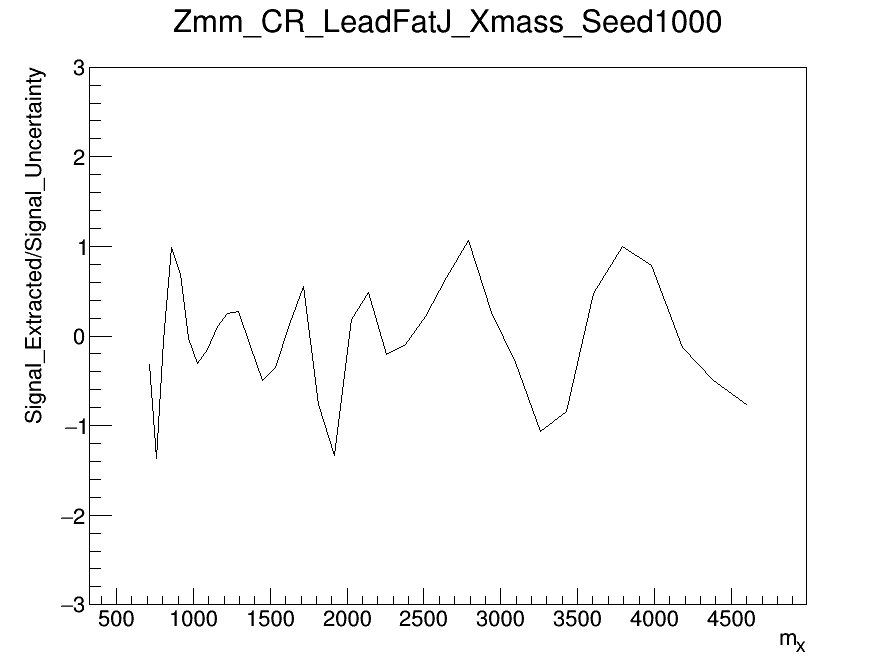

In [28]:
#plot
path="/global/homes/w/wding/zplusx_swifit/eos/spurious/ratio/"
paths=glob.glob(path+"*root")
Path=paths[0]
#print paths,Path
j=0
for i in paths:
    print i,j
    j=j+1
f=ROOT.TFile.Open(Path,"r")
hists=[]
for i in f.GetListOfKeys():
    hists.append(i.GetName())
print hists
j=0
for i in hists:
    print i,j
    j=j+1
hist=hists[15]
print hist
h1=f.Get(hist)
h1.GetYaxis().SetRangeUser(-3,3)
#h1.GetXaxis().SetTitle("m_{Z+X}")
h1.GetXaxis().SetTitle("m_{X}")
h1.GetYaxis().SetTitle("Signal_Extracted/Signal_Uncertainty")
print h1
c1=ROOT.TCanvas("c1","c1",100,0,900,700)
#c1.SetLogy()
ROOT.gStyle.SetOptStat(0)
c1.cd()
h1.Draw()
c1.Draw()
c1.SaveAs("figures/"+Path.split("/")[-1].split(".")[0]+"_"+hist+".jpg")
c1.SaveAs("figures/"+Path.split("/")[-1].split(".")[0]+"_"+hist+".pdf")